In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('idea_anicolon.csv')

df['sexo'] = df['sexo'].astype('category')
df['nper'] = df['nper'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145166 entries, 0 to 145165
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   sexo            145166 non-null  category
 1   estado_laboral  145166 non-null  object  
 2   nper            145166 non-null  category
 3   sueldo          145166 non-null  float64 
dtypes: category(2), float64(1), object(1)
memory usage: 2.5+ MB


In [3]:
df.describe()

,sueldo
count,145166.000000
mean,9711.315577
std,20269.848604
min,0.000000
25%,0.000000
50%,0.000000
75%,15000.000000
max,600000.000000


In [4]:
df.sample(5) 

,sexo,estado_laboral,nper,sueldo
143280,2.0,"Inactivo, jubilado",1.0,0.0
72982,1.0,Ocupados,1.0,0.0
118985,2.0,"Inactivo, realiza los quehaceres del hogar",1.0,0.0
125556,1.0,"Inactivo, realiza los quehaceres del hogar",2.0,0.0
80397,2.0,"Inactivo, realiza los quehaceres del hogar",2.0,0.0


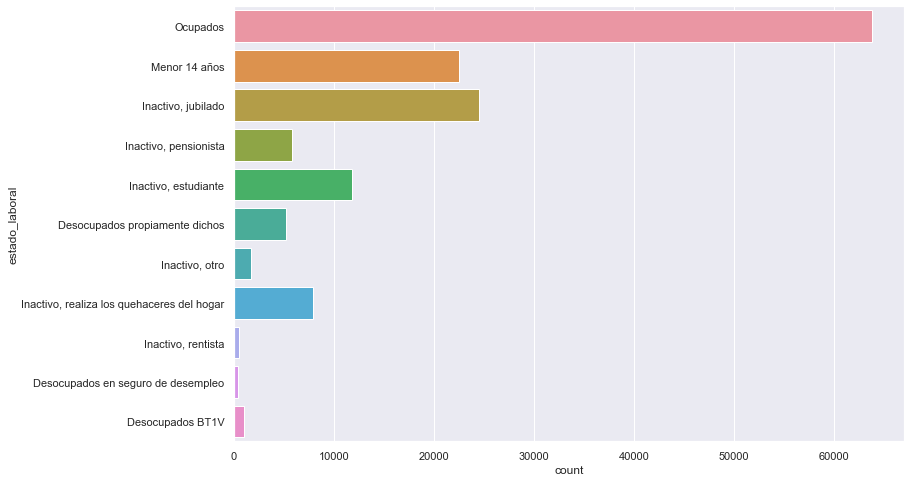

In [5]:
ax = sns.countplot(y=df['estado_laboral'])

# ax.bar_label(ax.containers[0])

In [6]:
df['sueldo'].max()

600000.0

In [7]:
df = df[df['sueldo'] > 0]

df = df[df['sueldo'] < df['sueldo'].max()]

In [8]:
df.describe() 

,sueldo
count,43450.000000
mean,32431.595788
std,25053.949035
min,200.000000
25%,18000.000000
50%,27000.000000
75%,40000.000000
max,380000.000000


In [9]:
df['sueldo'].mode()

0    30000.0
dtype: float64

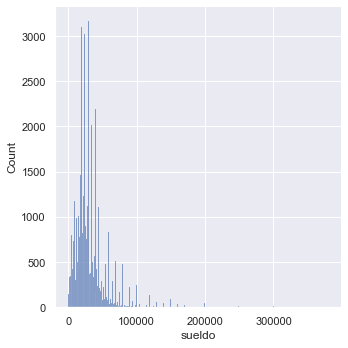

In [10]:
sns.displot(df['sueldo'])

<AxesSubplot:xlabel='sexo', ylabel='sueldo'>

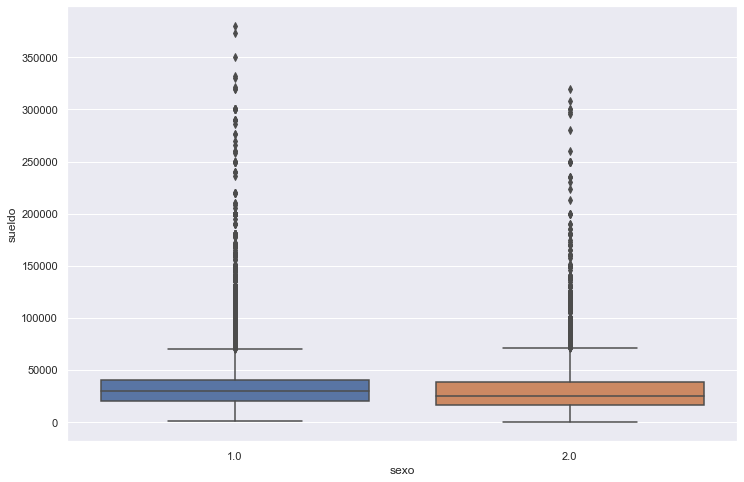

In [11]:
sns.boxplot(data=df, x=df['sexo'], y=df['sueldo'])

In [12]:
df

,sexo,estado_laboral,nper,sueldo
0,2.0,Ocupados,1.0,86000.0
1,1.0,Ocupados,2.0,80000.0
8,1.0,Ocupados,1.0,56000.0
9,2.0,Ocupados,2.0,32000.0
15,1.0,Ocupados,1.0,15000.0
...,...,...,...,...
145159,1.0,Ocupados,1.0,46000.0
145160,2.0,Ocupados,1.0,30000.0
145161,2.0,Ocupados,1.0,30000.0
145162,1.0,Ocupados,1.0,48000.0


In [13]:
quantil_99 = df['sueldo'].quantile(0.99)
print(quantil_99)

df_no_outliers = df[df['sueldo'] < quantil_99]

130000.0


In [14]:
quartil_1 = df_no_outliers['sueldo'].quantile(0.25)
quartil_3 = df_no_outliers['sueldo'].quantile(0.75)

iqr =  quartil_3 - quartil_1

print(quartil_1)
print(quartil_3)
print(iqr)

18000.0
40000.0
22000.0


In [15]:
df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] < quartil_3 + 1.5 * iqr]

df_no_outliers = df_no_outliers[df_no_outliers['sueldo'] > quartil_1 - 1.5 * iqr]

df_no_outliers

,sexo,estado_laboral,nper,sueldo
8,1.0,Ocupados,1.0,56000.0
9,2.0,Ocupados,2.0,32000.0
15,1.0,Ocupados,1.0,15000.0
16,2.0,Ocupados,2.0,35000.0
17,1.0,Ocupados,3.0,15000.0
...,...,...,...,...
145159,1.0,Ocupados,1.0,46000.0
145160,2.0,Ocupados,1.0,30000.0
145161,2.0,Ocupados,1.0,30000.0
145162,1.0,Ocupados,1.0,48000.0


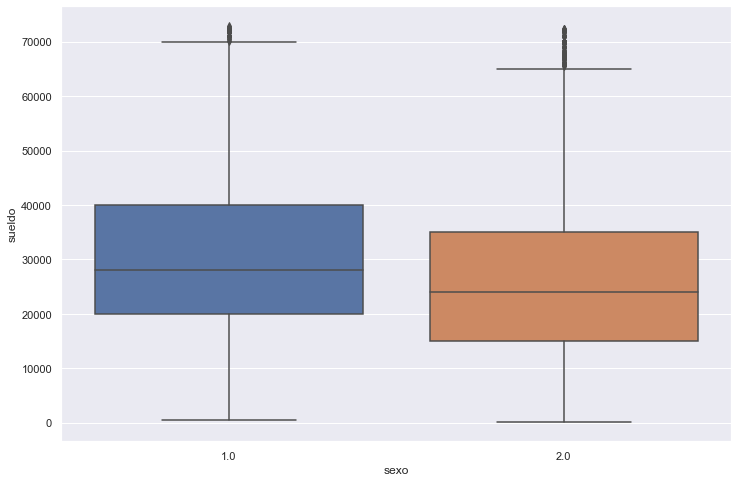

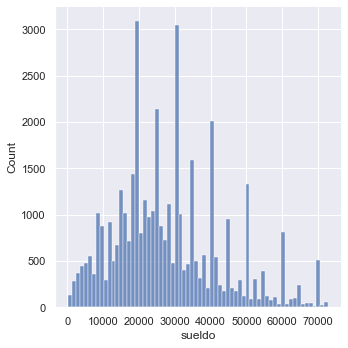

In [16]:
sns.boxplot(data=df_no_outliers, x='sexo', y='sueldo')

sns.displot(df_no_outliers['sueldo'])